In [1]:

import numpy as np
import matplotlib.pyplot as plt

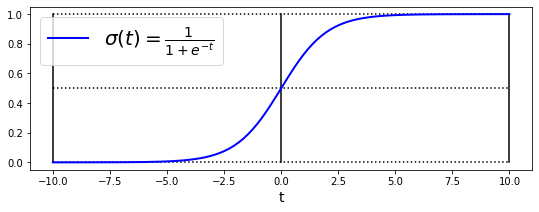

In [2]:

#Logistic Function
t = np.linspace(-10, 10, 200)
sigma = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10], [0,0], "k:")
plt.plot([-10,10], [0.5,0.5], "k:")
plt.plot([-10,10], [1,1], "k:")

plt.plot([0,0], [0,1], "k-")
plt.plot([-10,-10], [0,1], "k-")
plt.plot([10,10], [0,1], "k-")
plt.xlabel("t", fontsize=14)

plt.plot(t, sigma, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.legend(loc="upper left", fontsize=20)

In [3]:
from sklearn import datasets 
#Load the dataset
iris = datasets.load_iris()
list(iris.keys())
#Take only the data that we need
X = iris["data"][:,3] #Only the 3rd feature (petal width)
y = (iris["target"] == 2 ).astype(np.int) # 1 if Iris Virginica, else 0


In [4]:
#Let's train the logistic model 
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X.reshape(-1,1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

(0.0, 3.0, -0.02, 1.02)

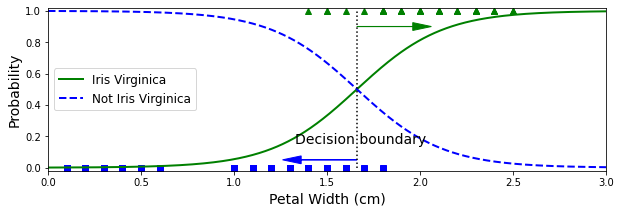

In [5]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = logistic_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] #the [0] takes the very first value where the y_proba is 0.5 or greater 

plt.figure(figsize=(10,3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:,1], "g-", linewidth=2, label="Iris Virginica")
plt.plot(X_new, y_proba[:,0], "b--",  linewidth=2, label="Not Iris Virginica")
plt.plot([decision_boundary,decision_boundary], [0,1.0], "k:")


plt.text(decision_boundary+0.02, 0.15,"Decision boundary", ha="center", color= "k", fontsize=14)
plt.arrow(decision_boundary, 0.05, -0.3,0, head_width=0.05,  head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.9, 0.3,0, head_width=0.05, head_length=0.1,fc="g", ec="g")


plt.ylabel("Probability", fontsize=14)
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.legend(loc="center left", fontsize=12)
plt.axis([0.0, 3.0, -0.02,1.02])

In [6]:
X = iris["data"][:, 1:3]
y = (iris["target"] == 2 ).astype(np.int) # 1 if Iris Virginica, else 0
logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

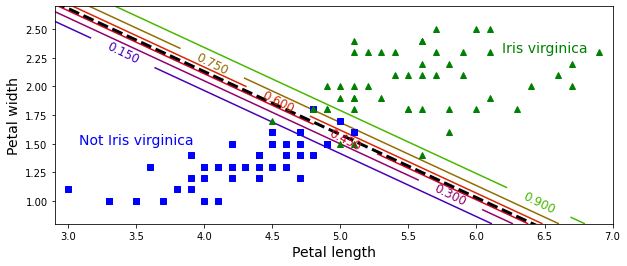

In [23]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width ("data" column, all instances, petal length (2) and petal width(3))
y = (iris["target"] == 2).astype(np.int) #Where the label/target is 2 (virginica)


log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

#x0 will have the row np.linspace(2.9, 7, 500).reshape(-1, 1) 200 times
#x1 will have the column  np.linspace(0.8, 2.7, 200).reshape(-1, 1) 500 times
#So we will wave a X_new with all the combinations of x0 and x1
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )


X_new = np.c_[x0.ravel(), x1.ravel()] #Ravel for plane the matrix and np.c_ for join them 

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))

plt.plot(X[y==0, 0], X[y==0, 1], "bs") #Blue Squares where y==0 for the first attribute ,0 and the 2nd attribute ,0
plt.plot(X[y==1, 0], X[y==1, 1], "g^") #Green triangle where y==1 for the first attribute ,0 and the 2nd attribute ,0

zz = y_proba[:, 1].reshape(x0.shape) #Probabilities of being a iris virginica

contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg) #this is to indicate the probability of the prediction on column 1
#(proba of iris virginica class) along the X0 and x1 features.
#i.e for x0=2.9, x1=1.0, zz has a probability of less than .150 to being an iris virginica 
#This process goes for all the cordinates.


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1] #?

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [28]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

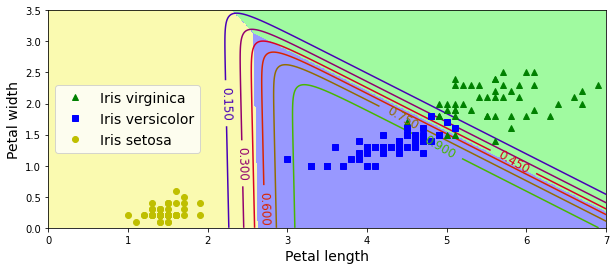

In [33]:
 x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap) #To show the predictions
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)#To show the probabilities of being an iris virginica 
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()